<a href="https://colab.research.google.com/github/HoagondeAmedegnato/Banks-Historical-Stock-Price-Portfolio/blob/main/00_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **BANKS HISTORICAL STOCK PRICE**

 Data Source: https://www.kaggle.com/tomasmantero/banks-historical-stock-price

 ***KPI: Help Investors Make Important Decisions And Predict New Trends*** 

 author = Hoagonde Amedegnato
 
 email = amereine69@gmail.com

# **BANKS STOCKS PRICES : EXPLORATORY DATA ANALYSIS (EDA)**

In [102]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# *Load and Read Data*

In [104]:
BAC = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/BAC (2).csv')
BAC

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.811729
1,2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.442013
2,2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.486385
3,2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.434616
4,2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.456806
...,...,...,...,...,...,...,...
3744,2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,27.580000
3745,2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,27.549999
3746,2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.980000
3747,2020-11-19,27.010000,26.650000,26.930000,26.980000,46423000.0,26.980000


In [105]:
C = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/C.csv')
C

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,379.511047
1,2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,372.504486
2,2006-01-05,487.799988,484.000000,484.399994,486.200012,1143100.0,374.352448
3,2006-01-06,489.000000,482.000000,488.799988,486.200012,1370200.0,374.352448
4,2006-01-09,487.399994,483.000000,486.000000,483.899994,1680700.0,372.581421
...,...,...,...,...,...,...,...
3744,2020-11-16,51.020000,49.860001,50.410000,50.400002,26699400.0,50.400002
3745,2020-11-17,50.930000,49.480000,49.840000,50.730000,18970000.0,50.730000
3746,2020-11-18,52.650002,51.009998,51.090000,51.049999,25824000.0,51.049999
3747,2020-11-19,52.320000,50.950001,51.599998,52.139999,20262400.0,52.139999


In [106]:
GS = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/GS.csv')
GS

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,106.263367
1,2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,104.795609
2,2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,104.754387
3,2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,106.238571
4,2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,107.516731
...,...,...,...,...,...,...,...
3744,2020-11-16,224.600006,220.029999,223.529999,222.380005,3004700.0,222.380005
3745,2020-11-17,224.850006,218.330002,220.020004,224.649994,2722900.0,224.649994
3746,2020-11-18,227.720001,223.509995,225.000000,224.300003,2856200.0,224.300003
3747,2020-11-19,224.940002,222.110001,224.300003,224.570007,1505200.0,224.570007


In [107]:
JPM = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/JPM.csv')
JPM

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,27.013376
1,2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,26.857462
2,2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,26.938803
3,2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0,27.128614
4,2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0,27.569229
...,...,...,...,...,...,...,...
3744,2020-11-16,118.610001,115.730003,117.790001,117.300003,19858600.0,117.300003
3745,2020-11-17,116.440002,114.580002,115.389999,116.110001,14553200.0,116.110001
3746,2020-11-18,118.610001,115.199997,117.339996,115.250000,12571200.0,115.250000
3747,2020-11-19,115.820000,113.559998,114.180000,115.559998,10202500.0,115.559998


In [108]:
MS = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/MS.csv')
MS

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,36.867344
1,2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,36.892612
2,2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,36.993786
3,2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,37.031731
4,2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,37.423725
...,...,...,...,...,...,...,...
3744,2020-11-16,58.139999,57.029999,57.759998,58.110001,12201400.0,58.110001
3745,2020-11-17,58.889999,57.200001,57.509998,58.810001,9599100.0,58.810001
3746,2020-11-18,60.130001,58.770000,59.000000,58.810001,11536700.0,58.810001
3747,2020-11-19,58.689999,57.860001,58.560001,58.630001,7220200.0,58.630001


In [109]:
WFC = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/WFC (1).csv')
WFC

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.723480
1,2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.483118
2,2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,20.460379
3,2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.580564
4,2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.577309
...,...,...,...,...,...,...,...
3744,2020-11-16,25.030001,24.389999,24.990000,24.900000,36954800.0,24.900000
3745,2020-11-17,25.150000,24.520000,24.530001,25.040001,29490400.0,25.040001
3746,2020-11-18,25.950001,25.059999,25.150000,25.059999,44318300.0,25.059999
3747,2020-11-19,26.219999,24.969999,25.190001,26.160000,44560000.0,26.160000


In [110]:
# Let's create a list for all banks stocks 
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [111]:
# Let's use pd.concat to concatenate all these bank stocks together into a single dataframe
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)
bank_stocks

BAC                        ...        WFC                       
            Date       High        Low  ...      Close      Volume  Adj Close
0     2006-01-03  47.180000  46.150002  ...  31.900000  11016400.0  20.723480
1     2006-01-04  47.240002  46.450001  ...  31.530001  10870000.0  20.483118
2     2006-01-05  46.830002  46.320000  ...  31.495001  10158000.0  20.460379
3     2006-01-06  46.910000  46.349998  ...  31.680000   8403800.0  20.580564
4     2006-01-09  46.970001  46.360001  ...  31.674999   5619600.0  20.577309
...          ...        ...        ...  ...        ...         ...        ...
3744  2020-11-16  28.000000  27.180000  ...  24.900000  36954800.0  24.900000
3745  2020-11-17  27.600000  27.010000  ...  25.040001  29490400.0  25.040001
3746  2020-11-18  27.930000  26.959999  ...  25.059999  44318300.0  25.059999
3747  2020-11-19  27.010000  26.650000  ...  26.160000  44560000.0  26.160000
3748  2020-11-20  26.950001  26.629999  ...  25.480000  38425200.0  25.480000

[3749 rows x 42 columns]

# *Examine Data*

In [112]:
# Check the first top 10 rows of bank_stocks using .head() method
bank_stocks.head(10)

BAC                        ...        WFC                       
         Date       High        Low  ...      Close      Volume  Adj Close
0  2006-01-03  47.180000  46.150002  ...  31.900000  11016400.0  20.723480
1  2006-01-04  47.240002  46.450001  ...  31.530001  10870000.0  20.483118
2  2006-01-05  46.830002  46.320000  ...  31.495001  10158000.0  20.460379
3  2006-01-06  46.910000  46.349998  ...  31.680000   8403800.0  20.580564
4  2006-01-09  46.970001  46.360001  ...  31.674999   5619600.0  20.577309
5  2006-01-10  46.509998  45.880001  ...  31.650000   7157800.0  20.561069
6  2006-01-11  46.250000  45.750000  ...  31.815001   8047000.0  20.668261
7  2006-01-12  46.230000  45.709999  ...  31.445000  10763600.0  20.427893
8  2006-01-13  46.000000  45.680000  ...  31.625000   6365600.0  20.544836
9  2006-01-17  45.580002  45.000000  ...  31.299999  10690400.0  20.333696

[10 rows x 42 columns]

In [113]:
# Check the bottom 10 rows of bank_stocks using .tail() method
bank_stocks.tail(10)

BAC                        ...        WFC                        
            Date       High        Low  ...      Close       Volume  Adj Close
3739  2020-11-09  28.270000  26.299999  ...  24.219999  102118900.0  24.219999
3740  2020-11-10  27.760000  27.180000  ...  24.190001   49029100.0  24.190001
3741  2020-11-11  27.770000  27.120001  ...  24.190001   38309200.0  24.190001
3742  2020-11-12  26.900000  26.309999  ...  23.809999   34505900.0  23.809999
3743  2020-11-13  27.209999  26.760000  ...  24.070000   30056100.0  24.070000
3744  2020-11-16  28.000000  27.180000  ...  24.900000   36954800.0  24.900000
3745  2020-11-17  27.600000  27.010000  ...  25.040001   29490400.0  25.040001
3746  2020-11-18  27.930000  26.959999  ...  25.059999   44318300.0  25.059999
3747  2020-11-19  27.010000  26.650000  ...  26.160000   44560000.0  26.160000
3748  2020-11-20  26.950001  26.629999  ...  25.480000   38425200.0  25.480000

[10 rows x 42 columns]

In [114]:
# Check how many rows I have in bank_stocks using len() function
len(bank_stocks)

3749

In [115]:
# Check the columns of bank_stocks
bank_stocks.columns

MultiIndex([('BAC',      'Date'),
            ('BAC',      'High'),
            ('BAC',       'Low'),
            ('BAC',      'Open'),
            ('BAC',     'Close'),
            ('BAC',    'Volume'),
            ('BAC', 'Adj Close'),
            (  'C',      'Date'),
            (  'C',      'High'),
            (  'C',       'Low'),
            (  'C',      'Open'),
            (  'C',     'Close'),
            (  'C',    'Volume'),
            (  'C', 'Adj Close'),
            ( 'GS',      'Date'),
            ( 'GS',      'High'),
            ( 'GS',       'Low'),
            ( 'GS',      'Open'),
            ( 'GS',     'Close'),
            ( 'GS',    'Volume'),
            ( 'GS', 'Adj Close'),
            ('JPM',      'Date'),
            ('JPM',      'High'),
            ('JPM',       'Low'),
            ('JPM',      'Open'),
            ('JPM',     'Close'),
            ('JPM',    'Volume'),
            ('JPM', 'Adj Close'),
            ( 'MS',      'Date'),
            ( 

In [116]:
# Check how many columns I have in bank_stocks using len() function
len(bank_stocks.columns)

42

In [117]:
# Check if bank_stocks contains any null values
bank_stocks.isnull().sum()

BAC  Date         0
     High         0
     Low          0
     Open         0
     Close        0
     Volume       0
     Adj Close    0
C    Date         0
     High         0
     Low          0
     Open         0
     Close        0
     Volume       0
     Adj Close    0
GS   Date         0
     High         0
     Low          0
     Open         0
     Close        0
     Volume       0
     Adj Close    0
JPM  Date         0
     High         0
     Low          0
     Open         0
     Close        0
     Volume       0
     Adj Close    0
MS   Date         0
     High         0
     Low          0
     Open         0
     Close        0
     Volume       0
     Adj Close    0
WFC  Date         0
     High         0
     Low          0
     Open         0
     Close        0
     Volume       0
     Adj Close    0
dtype: int64

In [118]:
# Using .dtypes() to check data types
print(bank_stocks.dtypes)

BAC  Date          object
     High         float64
     Low          float64
     Open         float64
     Close        float64
     Volume       float64
     Adj Close    float64
C    Date          object
     High         float64
     Low          float64
     Open         float64
     Close        float64
     Volume       float64
     Adj Close    float64
GS   Date          object
     High         float64
     Low          float64
     Open         float64
     Close        float64
     Volume       float64
     Adj Close    float64
JPM  Date          object
     High         float64
     Low          float64
     Open         float64
     Close        float64
     Volume       float64
     Adj Close    float64
MS   Date          object
     High         float64
     Low          float64
     Open         float64
     Close        float64
     Volume       float64
     Adj Close    float64
WFC  Date          object
     High         float64
     Low          float64
     Open   

In [119]:
# Using .info() to provide a concise summary of Dataset
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (BAC, Date)       3749 non-null   object 
 1   (BAC, High)       3749 non-null   float64
 2   (BAC, Low)        3749 non-null   float64
 3   (BAC, Open)       3749 non-null   float64
 4   (BAC, Close)      3749 non-null   float64
 5   (BAC, Volume)     3749 non-null   float64
 6   (BAC, Adj Close)  3749 non-null   float64
 7   (C, Date)         3749 non-null   object 
 8   (C, High)         3749 non-null   float64
 9   (C, Low)          3749 non-null   float64
 10  (C, Open)         3749 non-null   float64
 11  (C, Close)        3749 non-null   float64
 12  (C, Volume)       3749 non-null   float64
 13  (C, Adj Close)    3749 non-null   float64
 14  (GS, Date)        3749 non-null   object 
 15  (GS, High)        3749 non-null   float64
 16  (GS, Low)         3749 non-null   float64


In [120]:
# Using .describe() to provide full summary statistics
bank_stocks.describe()

BAC               ...           WFC             
              High          Low  ...        Volume    Adj Close
count  3749.000000  3749.000000  ...  3.749000e+03  3749.000000
mean     23.411744    22.844174  ...  3.021076e+07    32.484908
std      13.138513    12.972935  ...  3.060859e+07    11.951022
min       3.510000     2.530000  ...  2.392000e+06     5.976497
25%      14.080000    13.720000  ...  1.484270e+07    22.032833
50%      17.500000    17.160000  ...  2.134430e+07    26.862707
75%      30.100000    29.330000  ...  3.486900e+07    44.473499
max      55.080002    54.820000  ...  4.787366e+08    59.205624

[8 rows x 36 columns]

Answer to question 1- Let's consider "max" row, and "close" column of each bank to figure out the max Close price for each bank's stock throughout the time period:

- BAC = 54.900002
- C = 564.099976
- GS = 273.380005
- JPM = 141.089996
- MS = 89.300003
- WFC = 65.930000

The bank with the highest stock price is Citigroup (C) (564.099976)



Answer to question 7: Let's consider "std" row, and "close" column: For the year 2015, the Bank that is classified as the riskiest is Wells Fargo, WFC with 11.619048

# *Descriptive Statistical Analysis: Using "value counts" to count each feature*

In [121]:
# Count the variable of BAC
bank_stocks['BAC'].value_counts()

Date        High       Low        Open       Close      Volume       Adj Close
2020-11-20  26.950001  26.629999  26.740000  26.809999  40513900.0   26.809999    1
2010-12-10  12.850000  12.470000  12.650000  12.800000  224667700.0  11.305470    1
2010-12-29  13.420000  13.310000  13.390000  13.310000  74986200.0   11.755925    1
2010-12-28  13.490000  13.340000  13.380000  13.340000  119303600.0  11.782421    1
2010-12-27  13.400000  12.960000  12.980000  13.270000  116011000.0  11.720593    1
                                                                                 ..
2015-11-30  17.580000  17.420000  17.480000  17.430000  61893700.0   15.850609    1
2015-11-27  17.500000  17.330000  17.459999  17.480000  22937500.0   15.896079    1
2015-11-25  17.570000  17.410000  17.510000  17.440001  34939000.0   15.859701    1
2015-11-24  17.570000  17.250000  17.260000  17.469999  58724200.0   15.886983    1
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0   34.811729   

In [122]:
# Save the results to the dataframe and Rename the index
BAC_counts = bank_stocks['BAC'].value_counts().to_frame()
BAC_counts.rename(columns = {'BAC': 'value_counts'}, inplace = True)
BAC_counts.index.name = 'BAC'
BAC_counts

,,,,,,,0
Date,High,Low,Open,Close,Volume,Adj Close,
2020-11-20,26.950001,26.629999,26.740000,26.809999,40513900.0,26.809999,1
2010-12-10,12.850000,12.470000,12.650000,12.800000,224667700.0,11.305470,1
2010-12-29,13.420000,13.310000,13.390000,13.310000,74986200.0,11.755925,1
2010-12-28,13.490000,13.340000,13.380000,13.340000,119303600.0,11.782421,1
2010-12-27,13.400000,12.960000,12.980000,13.270000,116011000.0,11.720593,1
...,...,...,...,...,...,...,...
2015-11-30,17.580000,17.420000,17.480000,17.430000,61893700.0,15.850609,1
2015-11-27,17.500000,17.330000,17.459999,17.480000,22937500.0,15.896079,1
2015-11-25,17.570000,17.410000,17.510000,17.440001,34939000.0,15.859701,1


In [123]:
# Count the variable of C
bank_stocks['C'].value_counts()

Date        High        Low         Open        Close       Volume      Adj Close 
2020-11-20  52.110001   51.189999   51.830002   51.650002   15471100.0  51.650002     1
2010-12-10  47.700001   46.599998   47.000000   47.700001   76407700.0  42.312962     1
2010-12-29  48.000000   47.500000   48.000000   47.700001   16459800.0  42.312962     1
2010-12-28  48.000000   47.500000   47.900002   47.799999   18644300.0  42.401669     1
2010-12-27  47.900002   46.500000   46.599998   47.700001   29016700.0  42.312962     1
                                                                                     ..
2015-11-30  54.459999   53.970001   54.340000   54.090000   14603100.0  48.303116     1
2015-11-27  54.369999   53.720001   54.060001   54.209999   5483300.0   48.410271     1
2015-11-25  54.330002   53.759998   54.290001   54.080002   9859400.0   48.294189     1
2015-11-24  54.509998   53.709999   53.810001   54.180000   12950900.0  48.383488     1
2006-01-03  493.799988  481.100006  4

In [124]:
# Save the results to the dataframe and Rename the index
C_counts = bank_stocks['C'].value_counts().to_frame()
C_counts.rename(columns = {'C': 'value_counts'}, inplace = True)
C_counts.index.name = 'C'
C_counts

,,,,,,,0
Date,High,Low,Open,Close,Volume,Adj Close,
2020-11-20,52.110001,51.189999,51.830002,51.650002,15471100.0,51.650002,1
2010-12-10,47.700001,46.599998,47.000000,47.700001,76407700.0,42.312962,1
2010-12-29,48.000000,47.500000,48.000000,47.700001,16459800.0,42.312962,1
2010-12-28,48.000000,47.500000,47.900002,47.799999,18644300.0,42.401669,1
2010-12-27,47.900002,46.500000,46.599998,47.700001,29016700.0,42.312962,1
...,...,...,...,...,...,...,...
2015-11-30,54.459999,53.970001,54.340000,54.090000,14603100.0,48.303116,1
2015-11-27,54.369999,53.720001,54.060001,54.209999,5483300.0,48.410271,1
2015-11-25,54.330002,53.759998,54.290001,54.080002,9859400.0,48.294189,1


In [125]:
# Count the variable of GS
bank_stocks['GS'].value_counts()

Date        High        Low         Open        Close       Volume     Adj Close 
2020-11-20  224.809998  222.630005  223.000000  223.350006  1848100.0  223.350006    1
2010-12-10  168.470001  165.899994  166.410004  168.470001  4543600.0  145.347183    1
2010-12-29  169.779999  166.570007  169.399994  167.630005  3329800.0  144.622452    1
2010-12-28  171.229996  168.830002  170.000000  169.190002  2862900.0  145.968323    1
2010-12-27  170.000000  166.410004  166.789993  169.830002  2715000.0  146.520508    1
                                                                                    ..
2015-11-30  191.080002  189.240005  190.500000  190.020004  3415000.0  175.341736    1
2015-11-27  191.190002  188.850006  189.160004  190.470001  1092700.0  175.157166    1
2015-11-25  189.770004  188.149994  188.990005  189.149994  1495600.0  173.943298    1
2015-11-24  189.800003  186.559998  188.020004  188.669998  2679400.0  173.501877    1
2006-01-03  129.440002  124.230003  126.699997  

In [126]:
# Save the results to the dataframe and Rename the index
GS_counts = bank_stocks['GS'].value_counts().to_frame()
GS_counts.rename(columns = {'GS': 'value_counts'}, inplace = True)
GS_counts.index.name = 'GS'
GS_counts

,,,,,,,0
Date,High,Low,Open,Close,Volume,Adj Close,
2020-11-20,224.809998,222.630005,223.000000,223.350006,1848100.0,223.350006,1
2010-12-10,168.470001,165.899994,166.410004,168.470001,4543600.0,145.347183,1
2010-12-29,169.779999,166.570007,169.399994,167.630005,3329800.0,144.622452,1
2010-12-28,171.229996,168.830002,170.000000,169.190002,2862900.0,145.968323,1
2010-12-27,170.000000,166.410004,166.789993,169.830002,2715000.0,146.520508,1
...,...,...,...,...,...,...,...
2015-11-30,191.080002,189.240005,190.500000,190.020004,3415000.0,175.341736,1
2015-11-27,191.190002,188.850006,189.160004,190.470001,1092700.0,175.157166,1
2015-11-25,189.770004,188.149994,188.990005,189.149994,1495600.0,173.943298,1


In [127]:
# Count the variable of JPM
bank_stocks['JPM'].value_counts()

Date        High        Low         Open        Close       Volume      Adj Close 
2020-11-20  115.650002  114.089996  114.430000  114.570000  12718900.0  114.570000    1
2010-12-10  41.500000   40.770000   40.889999   41.430000   28449000.0  31.370220     1
2010-12-29  42.770000   42.299999   42.580002   42.360001   13637400.0  32.074406     1
2010-12-28  43.119999   42.470001   42.700001   42.610001   20386600.0  32.263699     1
2010-12-27  42.680000   41.799999   41.820000   42.669998   17203200.0  32.309135     1
                                                                                     ..
2015-11-30  67.519997   66.680000   67.279999   66.680000   15147500.0  57.597172     1
2015-11-27  67.330002   66.639999   67.000000   67.169998   4052500.0   58.020424     1
2015-11-25  67.120003   66.550003   66.930000   66.860001   7772000.0   57.752659     1
2015-11-24  67.139999   66.040001   66.169998   66.779999   10910000.0  57.683548     1
2006-01-03  40.360001   39.299999   3

In [128]:
# Save the results to the dataframe and Rename the index
JPM_counts = bank_stocks['JPM'].value_counts().to_frame()
JPM_counts.rename(columns = {'JPM': 'value_counts'}, inplace = True)
JPM_counts.index.name = 'JPM'
JPM_counts

,,,,,,,0
Date,High,Low,Open,Close,Volume,Adj Close,
2020-11-20,115.650002,114.089996,114.430000,114.570000,12718900.0,114.570000,1
2010-12-10,41.500000,40.770000,40.889999,41.430000,28449000.0,31.370220,1
2010-12-29,42.770000,42.299999,42.580002,42.360001,13637400.0,32.074406,1
2010-12-28,43.119999,42.470001,42.700001,42.610001,20386600.0,32.263699,1
2010-12-27,42.680000,41.799999,41.820000,42.669998,17203200.0,32.309135,1
...,...,...,...,...,...,...,...
2015-11-30,67.519997,66.680000,67.279999,66.680000,15147500.0,57.597172,1
2015-11-27,67.330002,66.639999,67.000000,67.169998,4052500.0,58.020424,1
2015-11-25,67.120003,66.550003,66.930000,66.860001,7772000.0,57.752659,1


In [129]:
# Count the variable of MS
bank_stocks['MS'].value_counts()

Date        High       Low        Open       Close      Volume      Adj Close
2020-11-20  58.740002  57.509998  58.360001  57.810001  7739900.0   57.810001    1
2010-12-10  27.040001  26.520000  26.700001  26.950001  11224000.0  22.460297    1
2010-12-29  27.580000  27.230000  27.459999  27.280001  6921500.0   22.735317    1
2010-12-28  27.770000  27.469999  27.600000  27.660000  6794200.0   23.052015    1
2010-12-27  27.540001  27.139999  27.250000  27.510000  5368200.0   22.926998    1
                                                                                ..
2015-11-30  34.529999  33.700001  33.810001  34.299999  17416300.0  30.310461    1
2015-11-27  33.919998  33.480000  33.630001  33.779999  3014600.0   29.850945    1
2015-11-25  33.750000  33.439999  33.619999  33.610001  6210000.0   29.700714    1
2015-11-24  33.779999  33.180000  33.270000  33.590000  7954500.0   29.683044    1
2006-01-03  58.490002  56.740002  57.169998  58.310001  5377000.0   36.867344    1
Length: 3

In [130]:
# Save the results to the dataframe and Rename the index
MS_counts = bank_stocks['MS'].value_counts().to_frame()
MS_counts.rename(columns = {'MS': 'value_counts'}, inplace = True)
MS_counts.index.name = 'MS'
MS_counts

,,,,,,,0
Date,High,Low,Open,Close,Volume,Adj Close,
2020-11-20,58.740002,57.509998,58.360001,57.810001,7739900.0,57.810001,1
2010-12-10,27.040001,26.520000,26.700001,26.950001,11224000.0,22.460297,1
2010-12-29,27.580000,27.230000,27.459999,27.280001,6921500.0,22.735317,1
2010-12-28,27.770000,27.469999,27.600000,27.660000,6794200.0,23.052015,1
2010-12-27,27.540001,27.139999,27.250000,27.510000,5368200.0,22.926998,1
...,...,...,...,...,...,...,...
2015-11-30,34.529999,33.700001,33.810001,34.299999,17416300.0,30.310461,1
2015-11-27,33.919998,33.480000,33.630001,33.779999,3014600.0,29.850945,1
2015-11-25,33.750000,33.439999,33.619999,33.610001,6210000.0,29.700714,1


In [131]:
# Count the variable of WFC
bank_stocks['WFC'].value_counts()

Date        High       Low        Open       Close      Volume      Adj Close
2020-11-20  26.230000  25.459999  26.040001  25.480000  38425200.0  25.480000    1
2010-12-10  30.559999  30.160000  30.320000  30.270000  40143400.0  22.566484    1
2010-12-29  31.280001  30.980000  31.230000  31.020000  12280700.0  23.125603    1
2010-12-28  31.299999  31.000000  31.059999  31.200001  14863300.0  23.259796    1
2010-12-27  31.340000  30.780001  30.910000  31.209999  13823700.0  23.267256    1
                                                                                ..
2015-11-30  55.689999  55.099998  55.459999  55.099998  15998900.0  46.617596    1
2015-11-27  55.470001  54.980000  55.340000  55.389999  4914000.0   46.862957    1
2015-11-25  55.520000  55.099998  55.459999  55.220001  10034400.0  46.719120    1
2015-11-24  55.480000  54.889999  55.139999  55.279999  14156500.0  46.769901    1
2006-01-03  31.975000  31.195000  31.600000  31.900000  11016400.0  20.723480    1
Length: 3

In [132]:
# Save the results to the dataframe and Rename the index
WFC_counts = bank_stocks['WFC'].value_counts().to_frame()
WFC_counts.rename(columns = {'WFC': 'value_counts'}, inplace = True)
WFC_counts.index.name = 'WFC'
WFC_counts

,,,,,,,0
Date,High,Low,Open,Close,Volume,Adj Close,
2020-11-20,26.230000,25.459999,26.040001,25.480000,38425200.0,25.480000,1
2010-12-10,30.559999,30.160000,30.320000,30.270000,40143400.0,22.566484,1
2010-12-29,31.280001,30.980000,31.230000,31.020000,12280700.0,23.125603,1
2010-12-28,31.299999,31.000000,31.059999,31.200001,14863300.0,23.259796,1
2010-12-27,31.340000,30.780001,30.910000,31.209999,13823700.0,23.267256,1
...,...,...,...,...,...,...,...
2015-11-30,55.689999,55.099998,55.459999,55.099998,15998900.0,46.617596,1
2015-11-27,55.470001,54.980000,55.340000,55.389999,4914000.0,46.862957,1
2015-11-25,55.520000,55.099998,55.459999,55.220001,10034400.0,46.719120,1


# *Create Bank Stocks Price (Close) DataFrame, called bank_stocks_close*

In [133]:
BAC = bank_stocks['BAC', 'Close']
BAC

0       47.080002
1       46.580002
2       46.639999
3       46.570000
4       46.599998
          ...    
3744    27.580000
3745    27.549999
3746    26.980000
3747    26.980000
3748    26.809999
Name: (BAC, Close), Length: 3749, dtype: float64

In [134]:
C = bank_stocks['C', 'Close']
C

0       492.899994
1       483.799988
2       486.200012
3       486.200012
4       483.899994
           ...    
3744     50.400002
3745     50.730000
3746     51.049999
3747     52.139999
3748     51.650002
Name: (C, Close), Length: 3749, dtype: float64

In [135]:
GS = bank_stocks['GS', 'Close']
GS

0       128.869995
1       127.089996
2       127.040001
3       128.839996
4       130.389999
           ...    
3744    222.380005
3745    224.649994
3746    224.300003
3747    224.570007
3748    223.350006
Name: (GS, Close), Length: 3749, dtype: float64

In [136]:
JPM = bank_stocks['JPM', 'Close']
JPM

0        40.189999
1        39.619999
2        39.740002
3        40.020000
4        40.669998
           ...    
3744    117.300003
3745    116.110001
3746    115.250000
3747    115.559998
3748    114.570000
Name: (JPM, Close), Length: 3749, dtype: float64

In [137]:
MS = bank_stocks['MS', 'Close']
MS

0       58.310001
1       58.349998
2       58.509998
3       58.570000
4       59.189999
          ...    
3744    58.110001
3745    58.810001
3746    58.810001
3747    58.630001
3748    57.810001
Name: (MS, Close), Length: 3749, dtype: float64

In [138]:
WFC = bank_stocks['WFC', 'Close']
WFC

0       31.900000
1       31.530001
2       31.495001
3       31.680000
4       31.674999
          ...    
3744    24.900000
3745    25.040001
3746    25.059999
3747    26.160000
3748    25.480000
Name: (WFC, Close), Length: 3749, dtype: float64

In [139]:
# Since all banks have the same Date, let's select the date column to concatenate 
DATE = bank_stocks['C', 'Date']
DATE

0       2006-01-03
1       2006-01-04
2       2006-01-05
3       2006-01-06
4       2006-01-09
           ...    
3744    2020-11-16
3745    2020-11-17
3746    2020-11-18
3747    2020-11-19
3748    2020-11-20
Name: (C, Date), Length: 3749, dtype: object

In [140]:
# Let's create a list for all banks stocks Price using close column
tickers_close = ['DATE', 'BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [141]:
# Let's use pd.concat to concatenate all these bank stocks close column together into a single dataframe
bank_stocks_close = pd.concat([DATE, BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers_close)
bank_stocks_close

,DATE,BAC,C,GS,JPM,MS,WFC
0,2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
1,2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2,2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
3,2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
4,2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...,...
3744,2020-11-16,27.580000,50.400002,222.380005,117.300003,58.110001,24.900000
3745,2020-11-17,27.549999,50.730000,224.649994,116.110001,58.810001,25.040001
3746,2020-11-18,26.980000,51.049999,224.300003,115.250000,58.810001,25.059999
3747,2020-11-19,26.980000,52.139999,224.570007,115.559998,58.630001,26.160000


# *Calculate The Return Of Each Bank On The Stocks Close*

In [142]:
df = bank_stocks['BAC', 'Close']
df

0       47.080002
1       46.580002
2       46.639999
3       46.570000
4       46.599998
          ...    
3744    27.580000
3745    27.549999
3746    26.980000
3747    26.980000
3748    26.809999
Name: (BAC, Close), Length: 3749, dtype: float64

In [143]:
BAC_daily_return = df.copy()

for j in range(1, len(df)):
  BAC_daily_return[j] = (df[j]-df[j-1])/df[j-1]

  BAC_daily_return[0] = 0

In [144]:
BAC_daily_return

0       0.000000
1      -0.010620
2       0.001288
3      -0.001501
4       0.000644
          ...   
3744    0.021481
3745   -0.001088
3746   -0.020690
3747    0.000000
3748   -0.006301
Name: (BAC, Close), Length: 3749, dtype: float64

In [145]:
df = bank_stocks['C', 'Close']
df

0       492.899994
1       483.799988
2       486.200012
3       486.200012
4       483.899994
           ...    
3744     50.400002
3745     50.730000
3746     51.049999
3747     52.139999
3748     51.650002
Name: (C, Close), Length: 3749, dtype: float64

In [146]:
C_daily_return = df.copy()

for j in range(1, len(df)):
  C_daily_return[j] = (df[j]-df[j-1])/df[j-1]

  C_daily_return[0] = 0

In [147]:
C_daily_return

0       0.000000
1      -0.018462
2       0.004961
3       0.000000
4      -0.004731
          ...   
3744    0.035758
3745    0.006548
3746    0.006308
3747    0.021352
3748   -0.009398
Name: (C, Close), Length: 3749, dtype: float64

In [148]:
df = bank_stocks['GS', 'Close']
df

0       128.869995
1       127.089996
2       127.040001
3       128.839996
4       130.389999
           ...    
3744    222.380005
3745    224.649994
3746    224.300003
3747    224.570007
3748    223.350006
Name: (GS, Close), Length: 3749, dtype: float64

In [149]:
GS_daily_return = df.copy()

for j in range(1, len(df)):
  GS_daily_return[j] = (df[j]-df[j-1])/df[j-1]

  GS_daily_return[0] = 0

In [150]:
GS_daily_return

0       0.000000
1      -0.013812
2      -0.000393
3       0.014169
4       0.012030
          ...   
3744    0.015063
3745    0.010208
3746   -0.001558
3747    0.001204
3748   -0.005433
Name: (GS, Close), Length: 3749, dtype: float64

In [151]:
df = bank_stocks['JPM', 'Close']
df

0        40.189999
1        39.619999
2        39.740002
3        40.020000
4        40.669998
           ...    
3744    117.300003
3745    116.110001
3746    115.250000
3747    115.559998
3748    114.570000
Name: (JPM, Close), Length: 3749, dtype: float64

In [152]:
JPM_daily_return = df.copy()

for j in range(1, len(df)):
  JPM_daily_return[j] = (df[j]-df[j-1])/df[j-1]

  JPM_daily_return[0] = 0

In [153]:
JPM_daily_return

0       0.000000
1      -0.014183
2       0.003029
3       0.007046
4       0.016242
          ...   
3744    0.028226
3745   -0.010145
3746   -0.007407
3747    0.002690
3748   -0.008567
Name: (JPM, Close), Length: 3749, dtype: float64

In [154]:
df = bank_stocks['MS', 'Close']
df

0       58.310001
1       58.349998
2       58.509998
3       58.570000
4       59.189999
          ...    
3744    58.110001
3745    58.810001
3746    58.810001
3747    58.630001
3748    57.810001
Name: (MS, Close), Length: 3749, dtype: float64

In [155]:
MS_daily_return = df.copy()

for j in range(1, len(df)):
  MS_daily_return[j] = (df[j]-df[j-1])/df[j-1]

  MS_daily_return[0] = 0

In [156]:
MS_daily_return

0       0.000000
1       0.000686
2       0.002742
3       0.001025
4       0.010586
          ...   
3744    0.026497
3745    0.012046
3746    0.000000
3747   -0.003061
3748   -0.013986
Name: (MS, Close), Length: 3749, dtype: float64

In [157]:
df = bank_stocks['WFC', 'Close']
df

0       31.900000
1       31.530001
2       31.495001
3       31.680000
4       31.674999
          ...    
3744    24.900000
3745    25.040001
3746    25.059999
3747    26.160000
3748    25.480000
Name: (WFC, Close), Length: 3749, dtype: float64

In [158]:
WFC_daily_return = df.copy()

for j in range(1, len(df)):
  WFC_daily_return[j] = (df[j]-df[j-1])/df[j-1]

  WFC_daily_return[0] = 0

In [159]:
WFC_daily_return

0       0.000000
1      -0.011599
2      -0.001110
3       0.005874
4      -0.000158
          ...   
3744    0.034483
3745    0.005623
3746    0.000799
3747    0.043895
3748   -0.025994
Name: (WFC, Close), Length: 3749, dtype: float64

In [160]:
# Since all banks have the same Date, let's select the date column to concatenate 
DATE = bank_stocks['WFC', 'Date']
DATE

0       2006-01-03
1       2006-01-04
2       2006-01-05
3       2006-01-06
4       2006-01-09
           ...    
3744    2020-11-16
3745    2020-11-17
3746    2020-11-18
3747    2020-11-19
3748    2020-11-20
Name: (WFC, Date), Length: 3749, dtype: object

In [161]:
# Let's create a list for all banks stocks return
Tickers = ['DATE', 'BAC_daily_return', 'C_daily_return', 'GS_daily_return', 'JPM_daily_return', 'MS_daily_return', 'WFC_daily_return']

In [162]:
# Let's use pd.concat to concatenate all these banks stocks return dataframes together to a single dataframe
bank_stocks_return = pd.concat([DATE, BAC_daily_return, C_daily_return, GS_daily_return, JPM_daily_return, MS_daily_return, WFC_daily_return], axis = 1, keys = Tickers)
bank_stocks_return

,DATE,BAC_daily_return,C_daily_return,GS_daily_return,JPM_daily_return,MS_daily_return,WFC_daily_return
0,2006-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2,2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
3,2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
4,2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...,...
3744,2020-11-16,0.021481,0.035758,0.015063,0.028226,0.026497,0.034483
3745,2020-11-17,-0.001088,0.006548,0.010208,-0.010145,0.012046,0.005623
3746,2020-11-18,-0.020690,0.006308,-0.001558,-0.007407,0.000000,0.000799
3747,2020-11-19,0.000000,0.021352,0.001204,0.002690,-0.003061,0.043895


Answer to question 3: The calculation of the return is based on the previous day of the comparison to the current day. Here, there is nothing in the past to compare with the first day.

# *Visualizations*

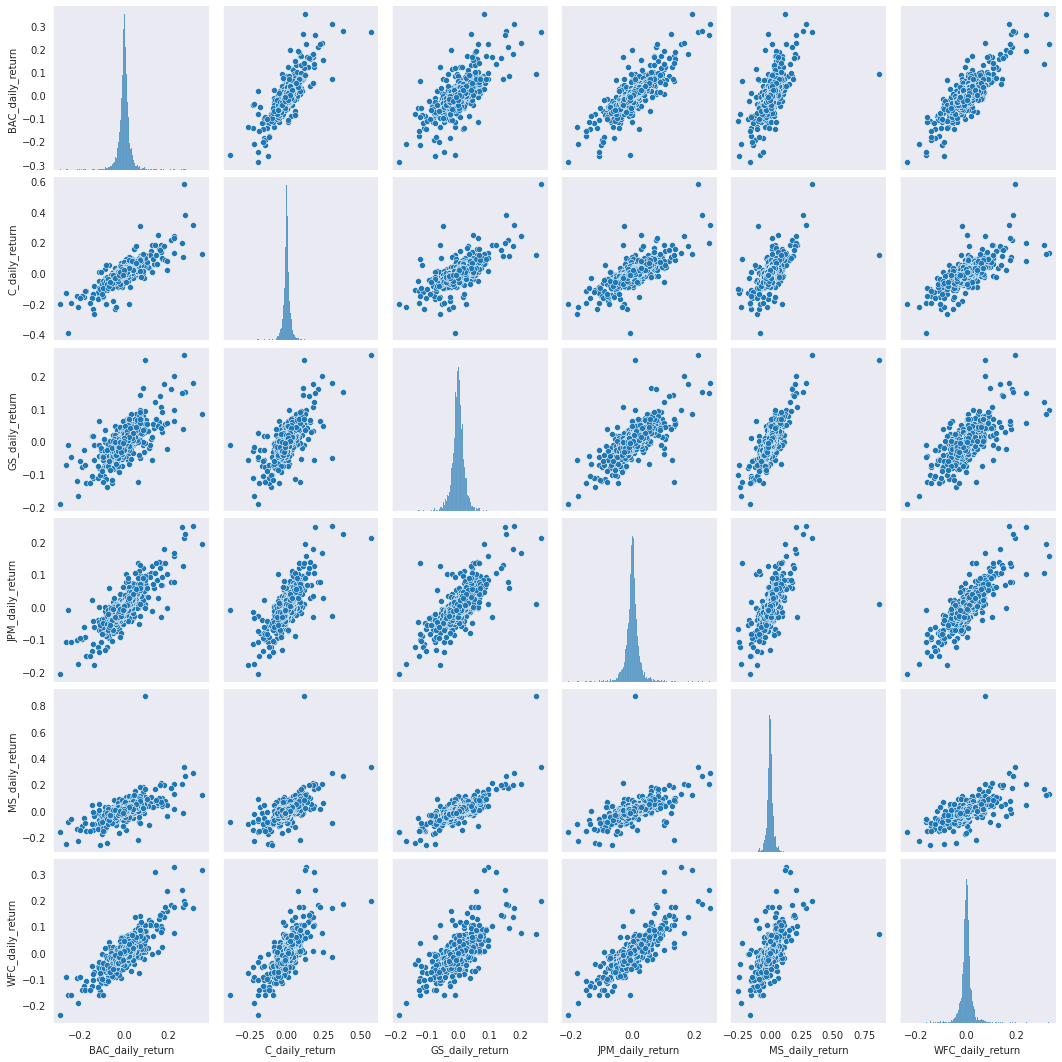

In [163]:
# Plot the pairplot of Bank Stocks Return
sns.pairplot(bank_stocks_return, vars = ['BAC_daily_return', 'C_daily_return', 'GS_daily_return', 'JPM_daily_return', 'MS_daily_return', 'WFC_daily_return'] )

In [164]:
# Define a function to plot the entire Bank Stocks Return dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!

def show_plot(df, fig_title):
  df.plot(figsize = (15,7), x = 'DATE', y = ['BAC_daily_return', 'C_daily_return', 'GS_daily_return', 'JPM_daily_return', 'MS_daily_return', 'WFC_daily_return'], linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

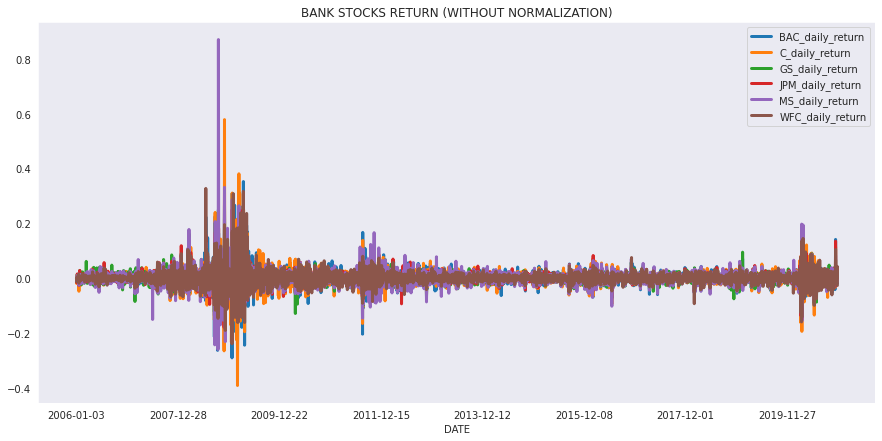

In [165]:
# Plot the Bank Stocks Return
sns.set_style('darkgrid')
show_plot(bank_stocks_return, 'BANK STOCKS RETURN (WITHOUT NORMALIZATION)')

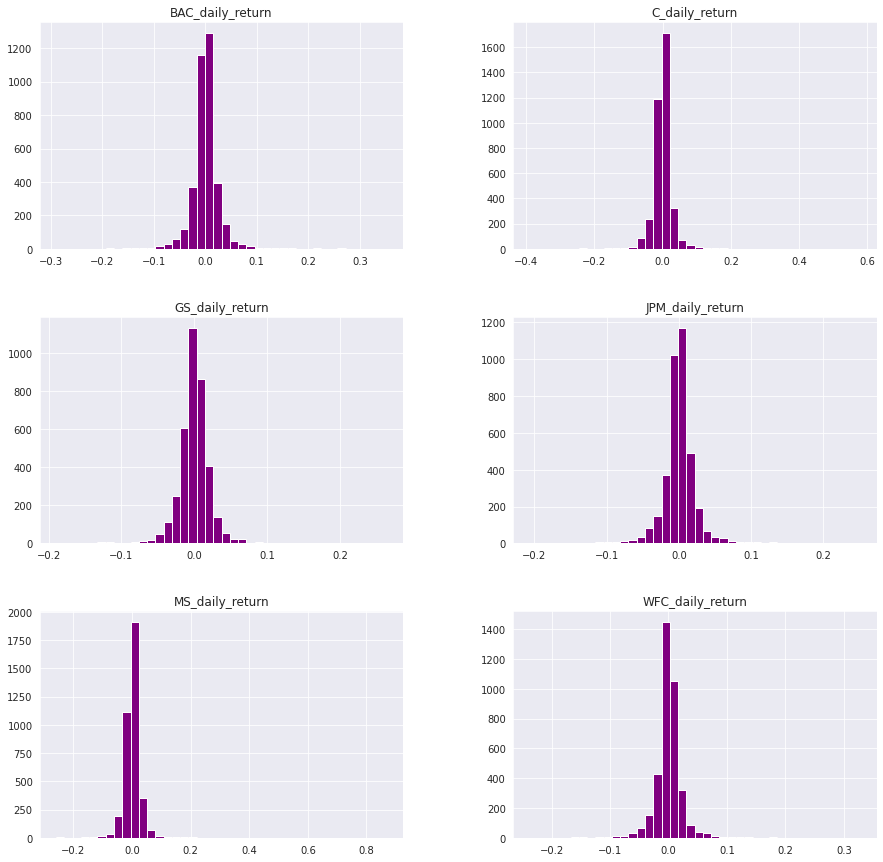

In [166]:
# Histogram of bank stocks returns
# Notice how Morgan Stanley (MS) Standard deviation is high indicating a more volatile stock
sns.set_style('darkgrid')
bank_stocks_return.hist(figsize=(15, 15), bins = 40, color = 'Purple');

Answer to question 6- The two most riskiest bank stocks over the entire time period are Citigroup (C) and Morgan Stanley (MS).

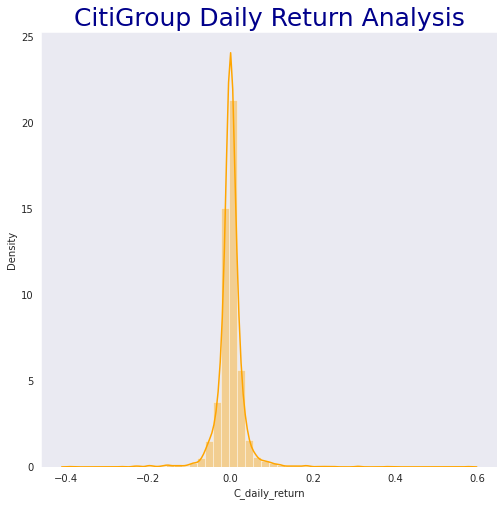

In [167]:
## Distribution of C daily return
sns.set_style('dark')
plt.figure(figsize = (18, 8))
plt.subplot(1,2,2)
sns.distplot(bank_stocks_return['C_daily_return'], color = 'orange')

plt.title('CitiGroup Daily Return Analysis', fontsize = 25, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.show();

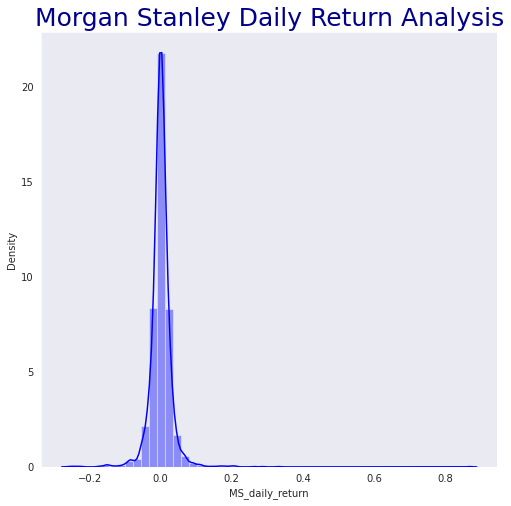

In [168]:
## Distribution of MS daily return
sns.set_style('dark')
plt.figure(figsize = (18, 8))
plt.subplot(1,2,2)
sns.distplot(bank_stocks_return['MS_daily_return'], color = 'blue')

plt.title('Morgan Stanley Daily Return Analysis', fontsize = 25, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.show();

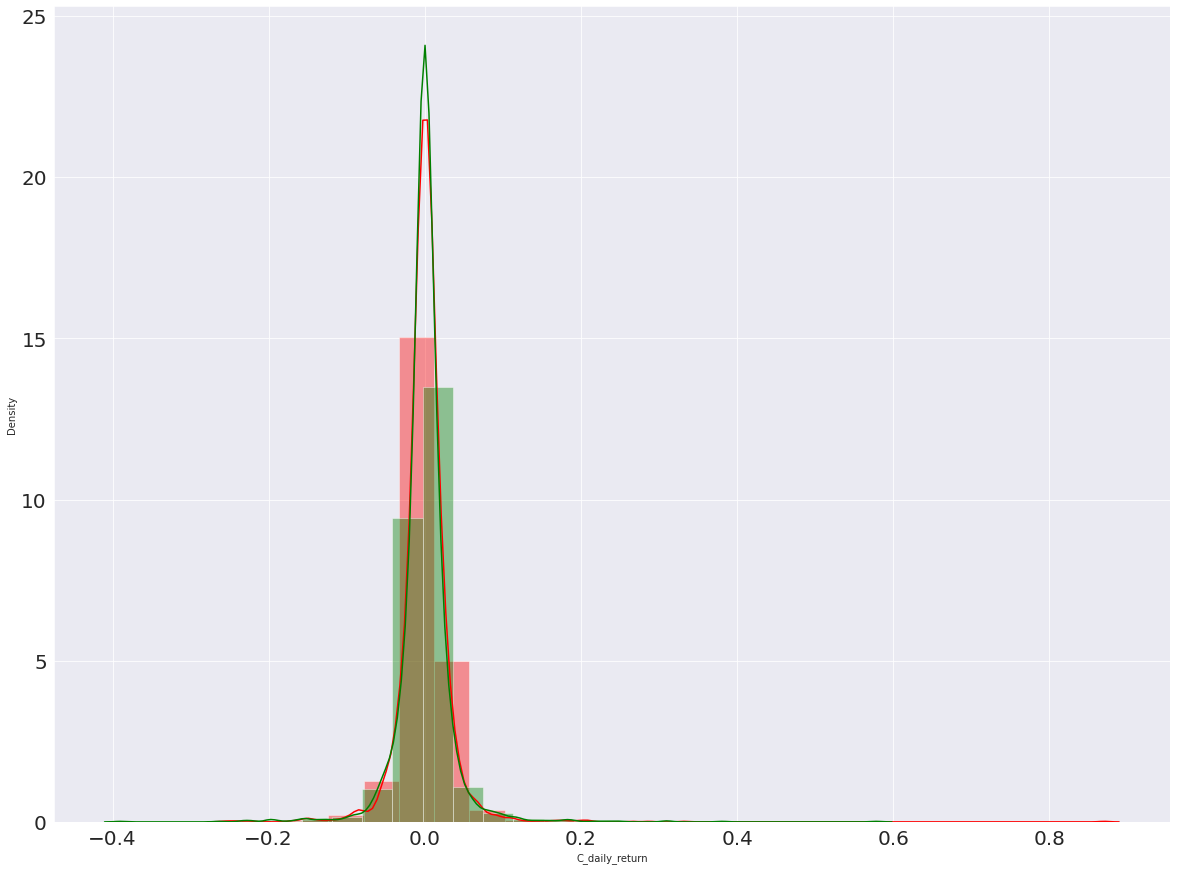

In [169]:
# Plot the distplot for both classes
plt.figure(figsize=(20, 15))
sns.distplot(bank_stocks_return['MS_daily_return'], bins = 25, color = 'red')
sns.distplot(bank_stocks_return['C_daily_return'], bins = 25, color = 'green')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.grid()

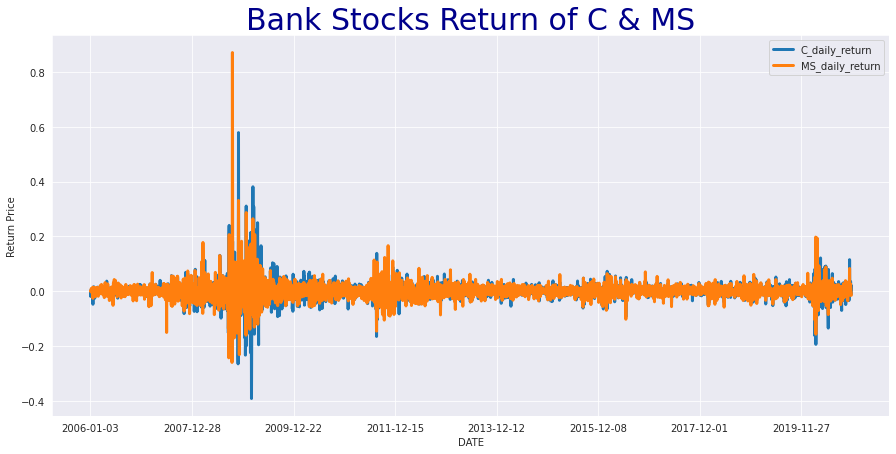

In [170]:
# Plot Stock Return of CitiGroup (C) and Morgan Stanley (MS)
bank_stocks_return.plot(x = 'DATE', y = ['C_daily_return', 'MS_daily_return'], linewidth = 3, figsize = (15,7))
plt.ylabel('Return Price')
plt.title('Bank Stocks Return of C & MS', fontsize = 30, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.grid()

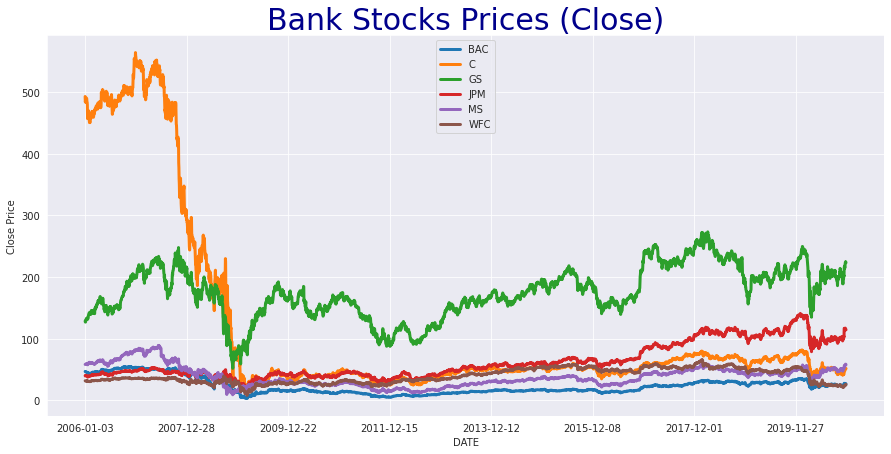

In [171]:
# Plot Bank Stocks Close DataFrame
bank_stocks_close.plot(x = 'DATE', y = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], linewidth = 3, figsize = (15,7))
plt.ylabel('Close Price')
plt.title('Bank Stocks Prices (Close)', fontsize = 30, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.legend(loc="upper center")
plt.grid()

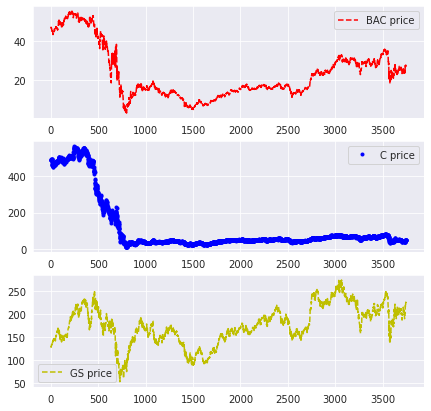

In [172]:
# Create Subplot for BAC, C, GS
plt.figure(figsize = (7,7))
plt.subplot(3, 1, 1)
plt.plot(bank_stocks_close.index, bank_stocks_close['BAC'], 'r--');
plt.grid()
plt.legend(['BAC price'])

plt.subplot(3, 1, 2)
plt.plot(bank_stocks_close.index, bank_stocks_close['C'], 'b.');
plt.grid()
plt.legend(['C price'])


plt.subplot(3, 1, 3)
plt.plot(bank_stocks_close.index, bank_stocks_close['GS'], 'y--');
plt.grid()
plt.legend(['GS price'])


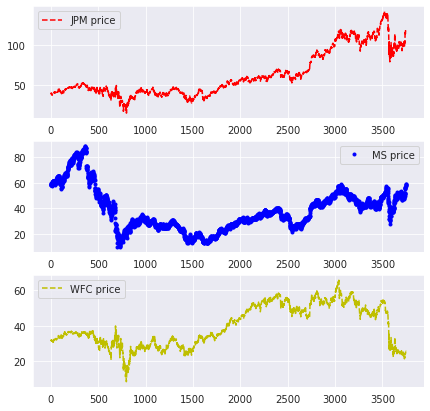

In [173]:
# Create Suplot for JPM, MS, WFC
plt.figure(figsize = (7,7))
plt.subplot(3, 1, 1)
plt.plot(bank_stocks_close.index, bank_stocks_close['JPM'], 'r--');
plt.grid()
plt.legend(['JPM price'])

plt.subplot(3, 1, 2)
plt.plot(bank_stocks_close.index, bank_stocks_close['MS'], 'b.');
plt.grid()
plt.legend(['MS price'])

plt.subplot(3, 1, 3)
plt.plot(bank_stocks_close.index, bank_stocks_close['WFC'], 'y--');
plt.grid()
plt.legend(['WFC price'])

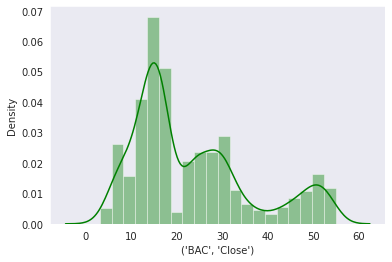

In [174]:
sns.set_style('dark')
sns.distplot(BAC, bins = 20, color = 'Green')

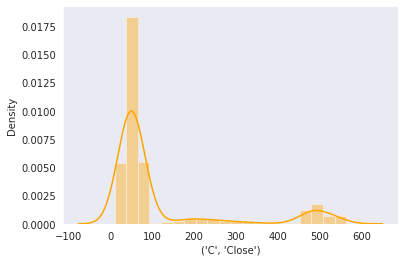

In [175]:
sns.set_style('dark')
sns.distplot(C, bins = 20, color = 'Orange')

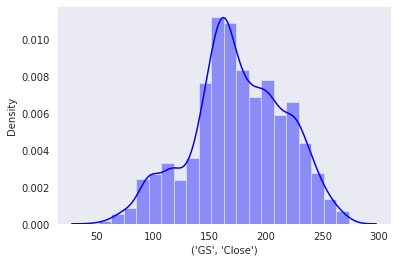

In [176]:
sns.set_style('dark')
sns.distplot(GS, bins = 20, color = 'Blue')

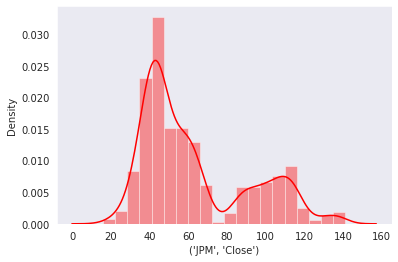

In [177]:
sns.set_style('dark')
sns.distplot(JPM, bins = 20, color = 'Red')

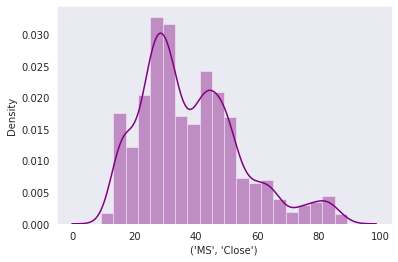

In [178]:
sns.set_style('dark')
sns.distplot(MS, bins = 20, color = 'Purple')

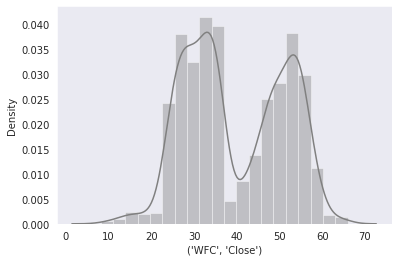

In [179]:
sns.set_style('dark')
sns.distplot(WFC, bins = 20, color = 'Gray')

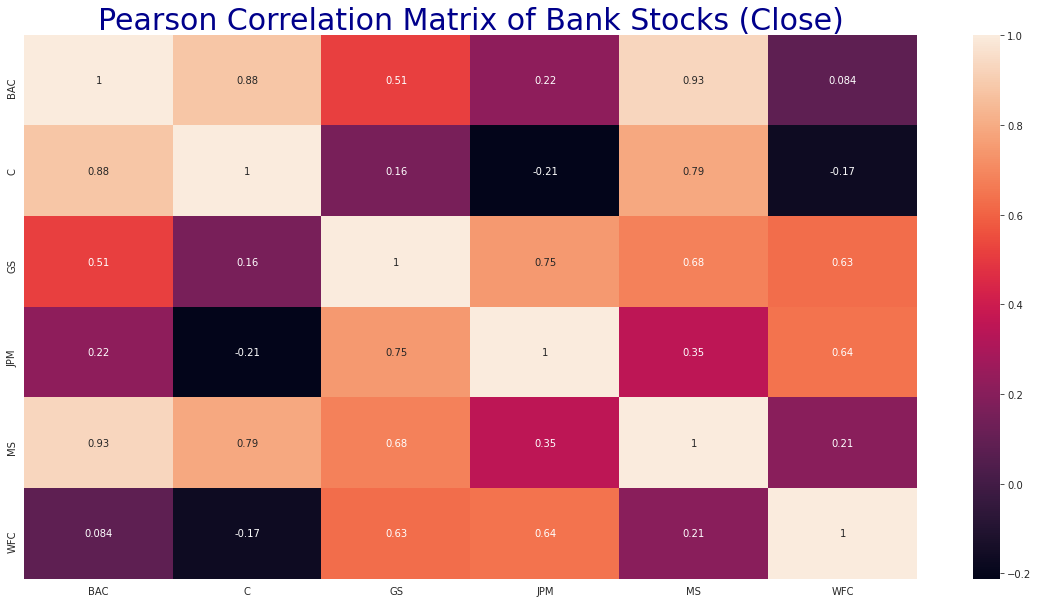

In [180]:
# Strong correlation between the Bank Stocks Price (Close)
plt.figure(figsize = (20, 10)) 
sns.heatmap(bank_stocks_close.corr(), annot = True) 
plt.title('Pearson Correlation Matrix of Bank Stocks (Close)', fontsize = 30, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.show();

- BAC and MS have a strong degree of correlation 0.93 
- C has a degree of correlation of 0.88
- GS and JPM have a degree of correlation of 0.75
- WFC has a degree of correlation of 0.64
- All these degrees correlation are close to 1, which means that there is a large positive relationship.

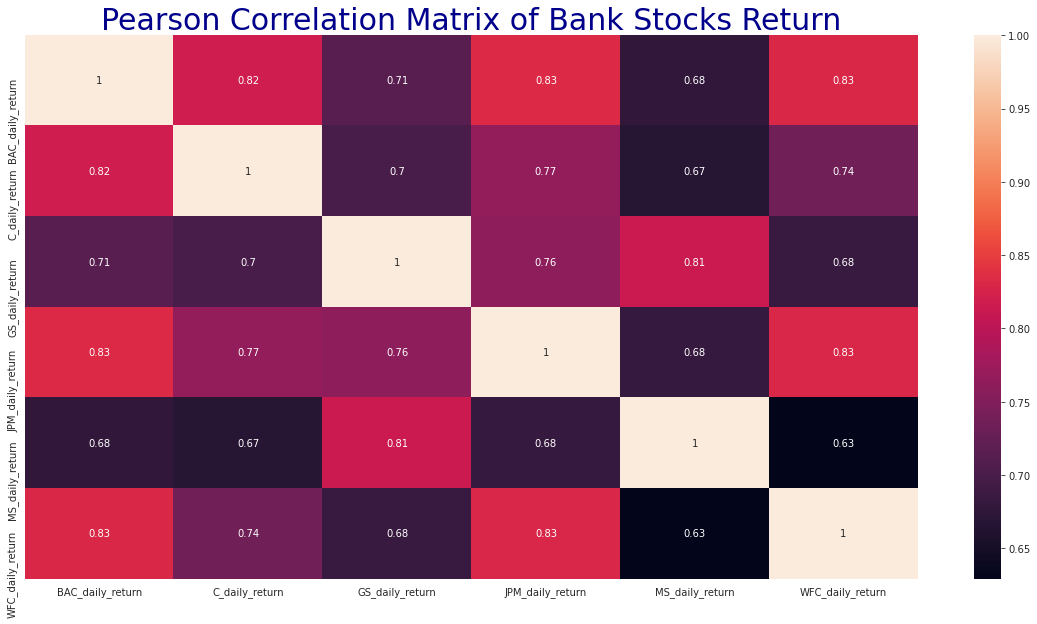

In [181]:
# Strong correlation between the Bank Stocks Return
plt.figure(figsize = (20, 10)) 
sns.heatmap(bank_stocks_return.corr(), annot = True) 
plt.title('Pearson Correlation Matrix of Bank Stocks Return', fontsize = 30, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.show();